# RESTful Face API Usage Example 🐸

# 1. Face Detection

*Need Valid API Token. Please include  **```Authorization: Token <your token>```**  in HTTP request header. **```Token```** is surrounded by 2 spaces.*

**Request parameters**:
- image: the image data. (opened with function `open()`)
- appID: the applicaiton where your service is executed

**Response data**:
- faces: a list of 
    - data: face data; a list of 3-list [R, G, B]. (flattened with row first)
    - size: the size of face; a tuple (width, heigh)


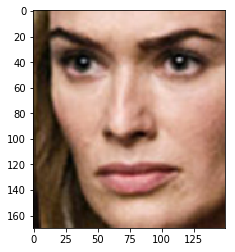

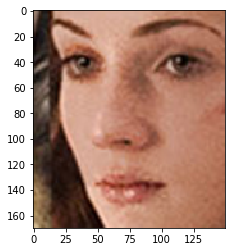

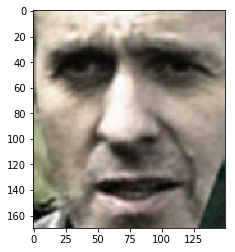

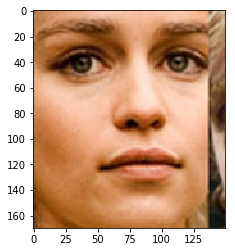

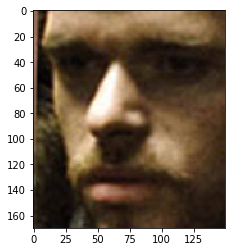

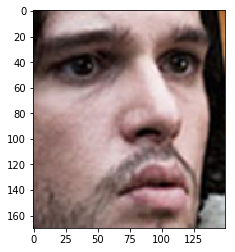

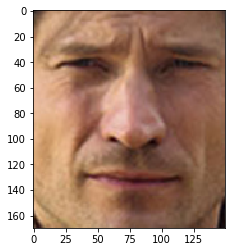

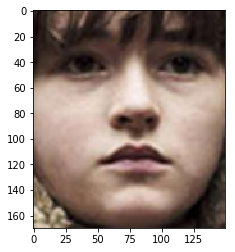

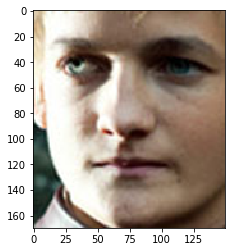

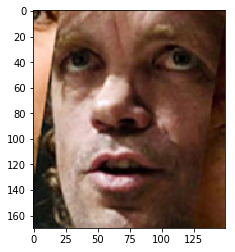

In [3]:
# Web request
import requests
import os
# Image manipulation
from PIL import Image
from pylab import *

host = 'http://127.0.0.1:8000/' # host address of our API
resource = 'commands/face_detection/' # resouce link

api_key = '9f2b20201c0376753e56b1aff29721a5722f8440' # your token
appID = '1138232516' # the appID of target app

# send requests
files = {'image': open('got.jpg')}
data = {'appID': appID}
headers = {'Authorization': 'Token '+api_key}
response = requests.post(os.path.join(host, resource), files=files, data=data, headers=headers)

# receive response
faces = response.json()['faces']

# show the results
face_images = []
for face in faces:
    face_data = [(pixel[0], pixel[1], pixel[2]) for pixel in face['data']] # convert to tuple

    face_image = Image.new(mode='RGB', size=face['size'])
    face_image.putdata(face_data)
    face_images.append(face_image)
    
    figure()
    imshow(face_image)
    show()

# 2. Face Enrollment

*Need Valid API Token. Please include  **```Authorization: Token <your token>```**  in HTTP request header. **```Token```** is surrounded by 2 spaces.*

**Request parameter**
- appID: the application where the face is enrolled
- userID: the person that the face is enrolled with
- name: the person that the face is enrolled with *specify `userID` or `name` * 
- image: the face to be enrolled. (**Must** be the face returned from ```detection``` service with width of 150 pixel and height of 170 pixel. Uploaded in format of opened file)

**Response data**:

- if successful,
    - information about the face obejct, including `image`, `person`, `created_time`, `modified_time`

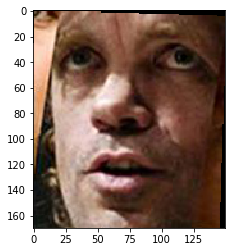

{u'url': u'http://127.0.0.1:8000/faces/2/', u'image': u'http://127.0.0.1:8000/media/faces/1592790269/u0339692024/170819/image_jCgbqCX', u'modified_time': u'2017-08-19', u'person': u'http://127.0.0.1:8000/persons/1/', u'created_time': u'2017-08-19', u'id': 2}


In [85]:
# for showing the example
# this should be replaced with actual file open, while using this interface in production
figure()
imshow(face_image)
show()

import tempfile
face_file = tempfile.TemporaryFile(mode='w+b')
face_image.save(face_file, format="JPEG")
face_file.seek(0)

# Web requests
import requests 
import os
# Image manipulation
from PIL import Image
from pylab import *

host = 'http://127.0.0.1:8000/' # host address of our API
resource = 'faces/' # resouce link

api_key = '9f2b20201c0376753e56b1aff29721a5722f8440' # your token
appID = '1592790269' # the appID of target app
userID = '0339692024'

# send requests
files = {'image': face_file}
data = {'appID': appID, 'userID': userID}
headers = {'Authorization': 'Token '+api_key}
response = requests.post(os.path.join(host, resource), files=files, data=data, headers=headers)

# receive response
response = response.json()

print response

# 3. Face Recognition

*Need Valid API Token. Please include  **```Authorization: Token <your token>```**  in HTTP request header. **```Token```** is surrounded by 2 spaces.*

**Request parameter**
- appID: the app where your service is to be executed 
- face: the face to be recognized

**Response data**
- if recognized,
    - person: the information of the recognized person
- if there is no any face inthe application,
    - info: No face enrolled!

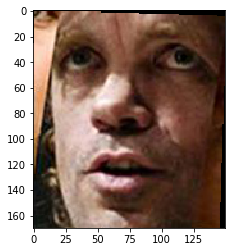

{u'name': u'person2', u'url': u'http://127.0.0.1:8000/persons/1/', u'appID': u'1592790269', u'userID': u'0339692024', u'faces': [u'http://127.0.0.1:8000/faces/1/', u'http://127.0.0.1:8000/faces/2/'], u'id': 1}
0.0


In [99]:
import os
figure()
imshow(face_image)
show()
import tempfile
tmpfile = tempfile.TemporaryFile(mode='w+b')
face_image.save(tmpfile, format="JPEG")
tmpfile.seek(0)

host = 'http://127.0.0.1:8000/' # host address of our API
resource = 'commands/recognition/' # resource link

api_key = '9f2b20201c0376753e56b1aff29721a5722f8440' # your token
appID = '1592790269' # the appID of target app

# send request
files = {'face': tmpfile}
data = {'appID': appID}
headers = {'Authorization': 'Token '+api_key}
response = requests.post(os.path.join(host, resource), files=files, data=data, headers=headers)

# receive response
response = response.json()
if 'info' in response:
    print response['info']

if 'person' in response:
    print response['person']
    print response['dis']